# CURSO ESTATÍSTICA NO PYTHON
## Análise de dados Financeiros
### Responsável: Danilo Alcântara  Milhomem
### Data: 19/01/2020
### Mestrado em Engenharia de Produção e Sistemas - MEPROS - PUC Goiás
### Otimização de portfólio
### Orientador (a): Dra. Maria José Pereira Dantas
 

## 1. IMPORTAR BIBLIOTECAS 

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 
#Este ultimo recurso é específico para usuários do jupyter Notebook. Ele facilita a plotagem de 
# gráficos do matplotlib logo abaixo das células de código e o armazenamento  delas no documento
# do notebook.


## 2. BAIXAR O PREÇO DOS ATIVOS DO SITE YAHOO FINANCE:

In [0]:
# INSERIR OS TICKERS DOS ATIVOS QUE SE DESEJAS ANALISAR
ativos = ['PETR4.SA', 'ITUB4.SA', 'WEGE3.SA', 'EQTL3.SA', 'RADL3.SA']

# DEFNIR A VARIAVEL, QUE RECBERÁ O PREÇO DOS ATIVOS COMO UM DATAFRAME:

pf_data = pd.DataFrame() 


In [0]:
for a in ativos:
  pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2009-1-1', end = '2019-1-1')['Adj Close']

## 3.  VISUALIZAR OS DADOS: O INICIO E FINAL DO DATAFRAME E INFORMAÇÕES GERAIS SOBRE O CONJUNTO DE DADOS

In [0]:
# INICIO: 5 PRIMEIRAS LINHAS
pf_data.head() # PODEMOS ADICIONAR NUMEROS ENTRE OS PARENTESES SE DESEJARMOS OBSERVAR UMA QUANTIDADE MAIOR DE DADOS

In [0]:
# FINAL: 5 ULTIMAS LINHAS
pf_data.tail()

In [0]:
# INFORMAÇÕES GERAIS SOBRE O CONJUNTO DE DADOS:
pf_data.info()

## 4. VERIFICAR DADOS FALTANTES E RETIRAR AS CÉLULAS QUE OS CONTEM:

In [0]:
# VERIFICAR EM QUAIS COLUNAS E EM QUE QUANTIDADE ESTÃO PRESENTES OS DADOS FALTANTES:
pf_data.isnull().sum() 


In [0]:
# RETIRAR DADOS FALTANTES DO CONJUNTO DE DADOS:
pf_data = pf_data.dropna(subset=['ITUB4.SA', 'WEGE3.SA', 'EQTL3.SA', 'RADL3.SA'])

In [0]:
# CONFERIR SE OS DADOS FORAM RETIRADOS:
pf_data.isnull().sum()

In [0]:
# VERIFICAR NOVAMENTE A QUANTIDADE DE DADOS EM CADA COLUNA DO DATAFRAME:
pf_data.info() 

## 5. ANÁLISE ESTATÍSTICA DOS DADOS:

In [0]:
# ESTATÍSTICA DESCRITIVA DO CONJUNTO DE DADOS:
pf_data.describe()

In [0]:
# GRÁFICO BOX-PLOT:
'''
Com esse gráfico é possível verificar o comportamento do conjunto de ações, por exemplo:
1º A dispersão é representada pela amplitude do gráfico, que pode ser calculada como máximo valor – mínimo valor. 
Quanto maior for a amplitude, maior a variação nos dados.
2º a presênça de outliers é uma forte indicação de que o ativo é extremamente sensível a mudanças (politica, social, climatica, fiscal).

Dependendo da estratégia do investidor, ações que apresentam um determinado comportamento (baixa ou alta volatilidade) nos dados podem ser 
escolhidas em detrimento de outras, por exemplo:
Ações muito voláteis são preferidas por investidos de curto prazo (" ideia de mineração de riqueza"), e ações menos voláteis são preferidas por investidores
de longo prazo ("ideia de ser sócio de um determinado negócio, sentimento de dono").
'''

pf_data.boxplot(figsize= (15, 7))

In [0]:
# Para realizar uma comparação justa é ecessário normalizar os dados, pois cada ativos possui uma precificação
# que é inerente ao seu setor e que difere dos demais ativos. Portanto, vamos trazer todos os dados para a base 100
data = (pf_data/pf_data.iloc[0] * 100) #.plot(figsize=(20,10))

data.boxplot(figsize= (15, 7));

In [0]:
# MATRIZ DE COVARIANCIA
'''
Com essa matriz podemos verificar tanto a força como a direção da relação linear entre duas variáveis.
Entretanto, é dificil fazer julgamento sobre o poder da relação entre duas variveis usando o covariancia, porque essa medida
não é padronizada.
'''
pf_data.cov()

In [0]:
#  Crie um mapa de calor da covariância entre os preços de fechamento ajustado das ações. 
sns.heatmap(pf_data.cov(), annot=True, linewidths=2 , fmt='.4');

In [0]:
# MATRIZ DE CORRELAÇÃO:
'''
Com essa matriz podemos verificar tanto a força como a direção da relação linear entre duas variáveis. A correlação é uma medida padronizada entre [-1, 1].
corr = 1: correlação perfeitamente positiva, ou seja, se um dos ativos sofre aumento em seu preço, o outro também apresenta alta no preço.  
Corr = -1: correlação perfeitamente negativa, ou seja, se o preço de um ativo sofre uma alta, o preço do outro ativo desce.

Essa informação é importante tanto para conhecer o comportamento de um conjunto de ativos do mesmo setor ou de setores diferentes,
 quanto para quem deseja diversificar seus investimentos. Para diversificar os investimentos (construir uma carteira de ações) e obter bons resultados
 é necessários incluir ações que tenham comportamentos diferentes de forma que, de maneira geral, o resultado da carteira seja positivo, 
 indepentmente da baixa no preços de alguns ativos. O modelo de Markowitz pode ser usado para construir uma carteira diversificada 
 levando em consideração (dentre outras variáveis) a correlação entre os ativos.
'''
pf_data.corr()

In [0]:
#  Crie um mapa de calor da correlação entre os preços de fechamento ajustado das ações. 
sns.heatmap(pf_data.corr(), annot=True, linewidths=2 , fmt='.4');

In [0]:
# CALCULAR O VALOR MEDIO DO PREÇO DE CADA AÇÃO:
'''
É comum a inserção de médias nas análises do preço de ativos, mas, há autores que defendem o uso de medidas
"robustas", e a mediana é uma delas. Ela é considerada robusta por que não sofre tanto impacto da volatilidade quanto a média.
'''
media = pf_data.mean()
print("Média", '\n', media)
mediana = pf_data.median()
print('\n', "Mediana", '\n', mediana)

Médias móveis:

Vamos analisar as médias móveis para essas ações no ano de 2010.
** Trace a média de 30 dias para o preço próximo de cada ativo para o ano de 2010 **

In [0]:
for i in range(len(ativos)):
  plt.figure(figsize=(12,6))
  pf_data[ativos[i]].loc['2010-01-01':'2011-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
  pf_data[ativos[i]].loc['2010-01-01':'2011-01-01'].plot(label= str(ativos[i] + 'ADJ CLOSE'))
  plt.legend()

In [0]:
import datetime
tickers = ["EQTL3.SA"]
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2016, 1, 1)
EQTL3 = wb.DataReader("EQTL3.SA", 'yahoo', start, end)
# podemos baixar tabém usando:
#EQTL3 = wb.DataReader(['EQTL3.SA'],'yahoo', start, end)
#EQTL3 = pd.concat([EQTL3],axis=1 #,keys=tickers)
EQTL3

In [0]:
from google.colab import files
# TRANSFORMA O DATAFRAME EM UM ARQUIVO EXCEL E REALIZA O DOWNLOAD:
EQTL3_csv = EQTL3.to_csv('EQTL3.csv')


In [0]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('EQTL3.csv')


fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

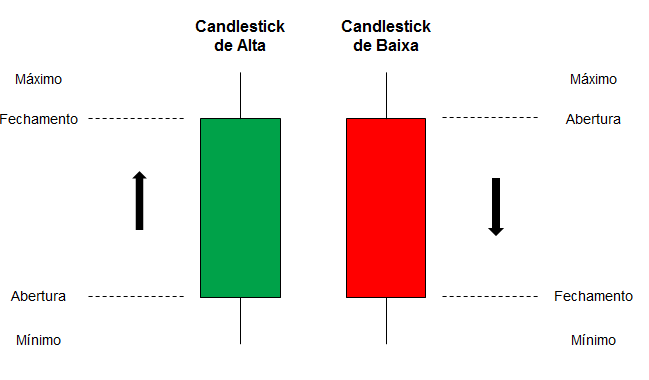

In [0]:
# VERIFICAR O DIA EM QUE O PREÇO DA AÇÃO FOI O MENOR E O MAIOR
'''
Essa estratégia pode ser usada por invstidores que procuram entender o porque o 
preço de uma determinada ação caiu ou subiu, procurando por meio das data, acontecimentos
climaticos, politicos, culturais, sociais...
'''
menor_preco = pf_data.idxmin()
print("Data do menor preço histórico", '\n', menor_preco)

maior_preco = pf_data.idxmax()
print('\n', "Data do maior preço histórico", '\n', maior_preco)

## 6. COMPARAR A PERFORMANCE DA EVOLUÇÃO DOS PREÇOS DOS ATIVOS:

In [0]:
# Para realizar uma comparação justa é ecessário normalizar os dados, pois cada ativos possui uma precificação
# que é inerente ao seu setor e que difere dos demais ativos. Portanto, vamos trazer todos os dados para a base 100
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(15,7))

## 7. CALCULAR RETORNOS:

** Crie um novo DataFrame vazio chamado returns. Este dataframe conterá os retornos para o ação de cada banco. Os retornos geralmente são definidos por: **


$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [0]:
returns = pd.DataFrame()

** Podemos usar o método pct_change () pandas na coluna close para criar uma coluna que represente esse valor de retorno. Crie um loop for que vá e para cada Bank Stock Ticker cria essa coluna de retorno e configura-a como uma coluna nos dados DataFrame. **

In [0]:

for item in ativos:
    returns[item ] = pf_data[item].pct_change()
returns.head(100)

** Crie um parplot utilizando seaborn no dataframe de retorno. **

In [0]:
sns.pairplot(returns[:]);

In [0]:
returns.corr()

## 8. SALVAR DADOS EM EXCEL E FAZER DOWNLOAD:

In [0]:
# TRANSFORMA O DATAFRAME EM UM ARQUIVO EXCEL E REALIZA O DOWNLOAD:
pf_data_excel = pf_data.to_excel('serie_temporal.xlsx')
files.download('serie_temporal.xlsx')